🔹 Step 1: Import Libraries & Load Data

In [42]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay)
import joblib

# Load data
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nColumns:", train_df.columns.tolist())

# Show first rows
train_df.head()

Train shape: (80000, 10)
Test shape: (20000, 10)

Columns: ['Unnamed: 0', 'gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,Female,80.0,0,1,never,25.19,6.6,140,0
1,1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,2,Male,28.0,0,0,never,27.32,5.7,158,0
3,3,Female,36.0,0,0,current,23.45,5.0,155,0
4,4,Male,76.0,1,1,current,20.14,4.8,155,0


🔹 Step 2: EDA (Exploratory Data Analysis)

Missing values per column:
Unnamed: 0             0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


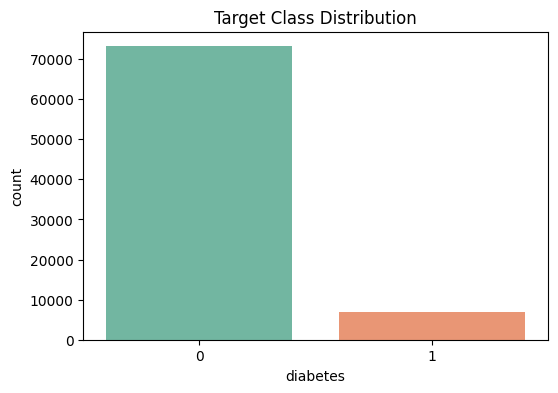

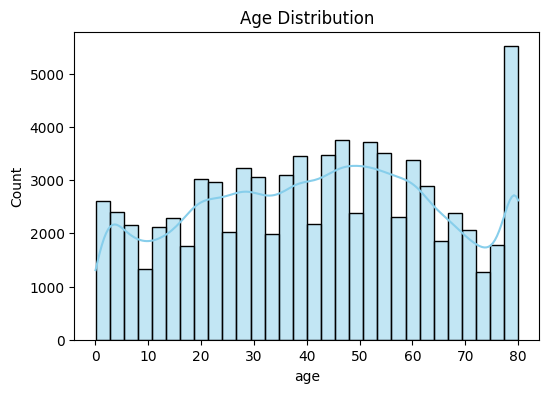

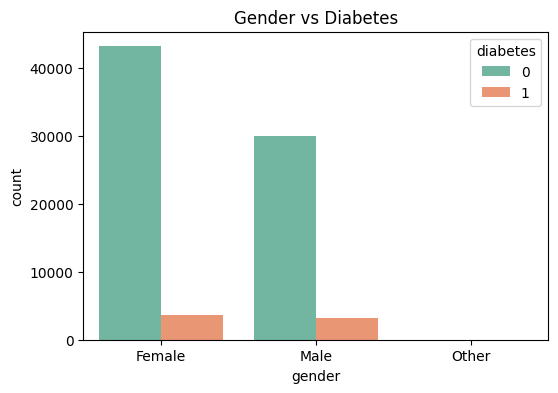

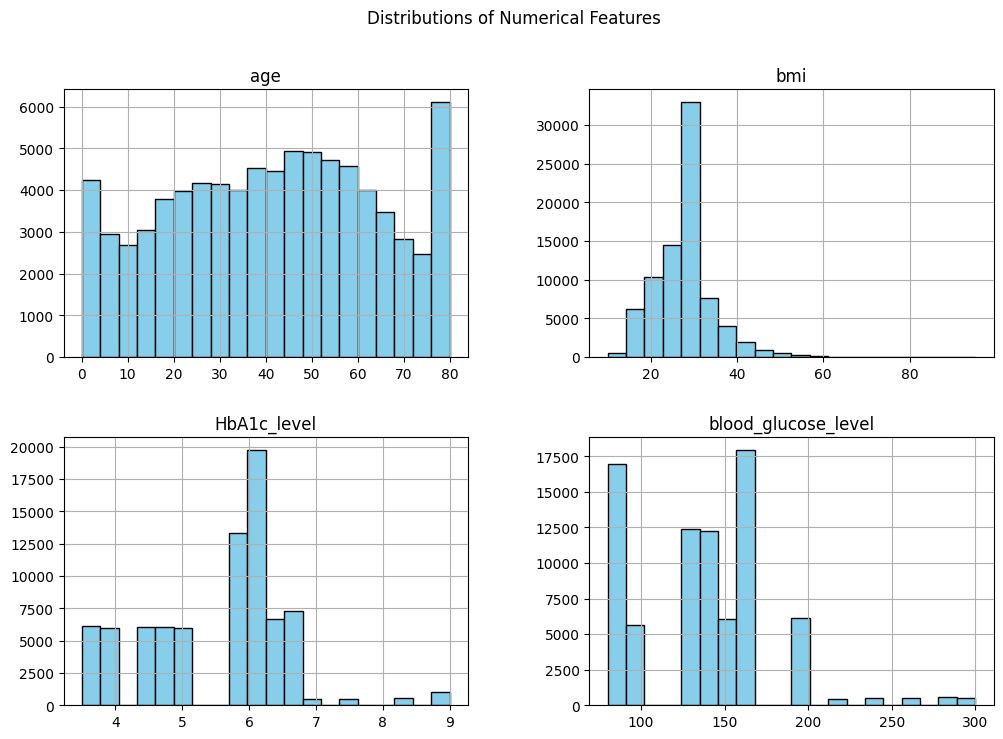

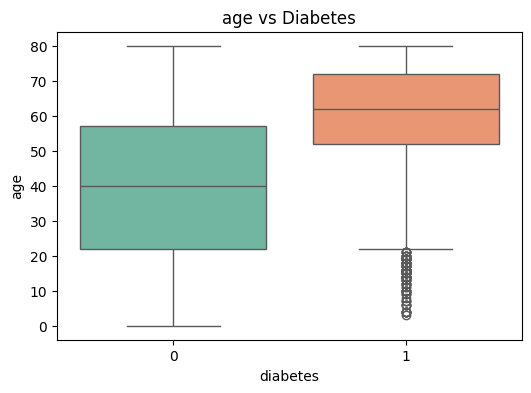

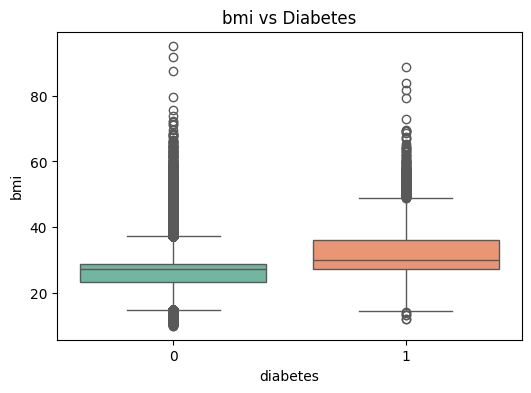

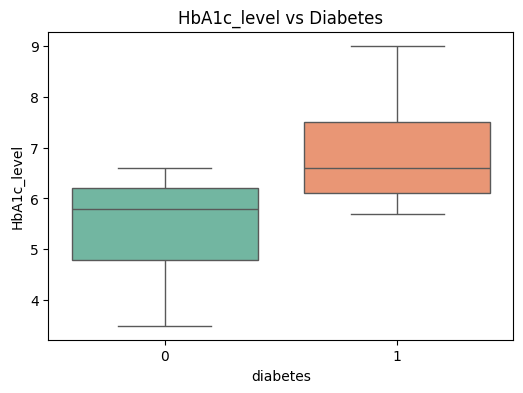

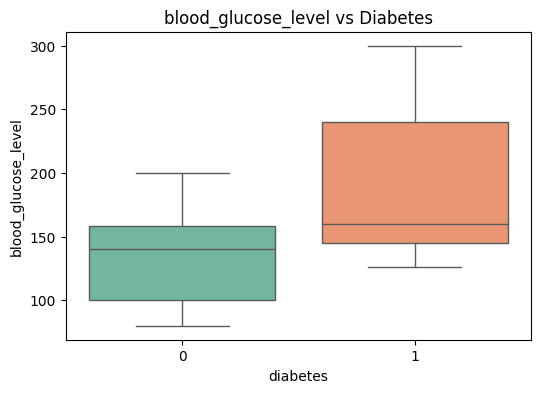

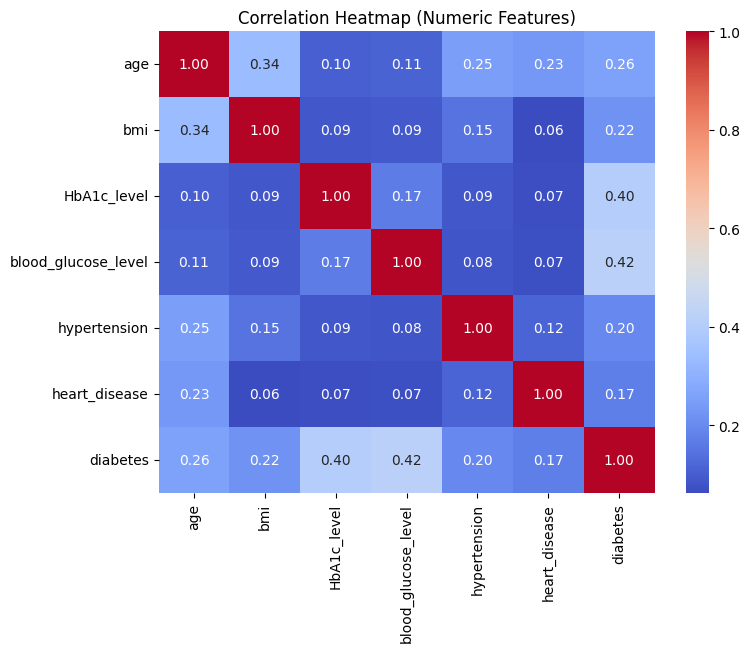

In [43]:
# 1. Check missing values
print("Missing values per column:")
print(train_df.isnull().sum())

# 2. Target Class Distribution (fixed warning)
plt.figure(figsize=(6,4))
sns.countplot(x="diabetes", data=train_df, hue="diabetes", palette="Set2", legend=False)
plt.title("Target Class Distribution")
plt.show()

# 3. Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(train_df["age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

# 4. Gender vs Diabetes
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="diabetes", data=train_df, palette="Set2")
plt.title("Gender vs Diabetes")
plt.show()

# 5. Distribution of numerical features
num_cols = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
train_df[num_cols].hist(bins=20, figsize=(12, 8), color="skyblue", edgecolor="black")
plt.suptitle("Distributions of Numerical Features")
plt.show()

# 6. Boxplots: Numerical features vs Diabetes (fixed warning)
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="diabetes", y=col, data=train_df, hue="diabetes", palette="Set2", legend=False)
    plt.title(f"{col} vs Diabetes")
    plt.show()

# 7. Correlation Heatmap (numeric features only)
plt.figure(figsize=(8,6))
sns.heatmap(train_df[["age", "bmi", "HbA1c_level", 
                      "blood_glucose_level", "hypertension", 
                      "heart_disease", "diabetes"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

🔹 Step 3: Data Preprocessing

In [44]:
# Encode categorical variables safely
categorical_cols = ["gender", "smoking_history"]
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# Fit on train and apply to both
train_df[categorical_cols] = encoder.fit_transform(train_df[categorical_cols])
test_df[categorical_cols] = encoder.transform(test_df[categorical_cols])

# Drop unnecessary column "Unnamed: 0" 
X = train_df.drop(["diabetes", "Unnamed: 0"], axis=1)
y = train_df["diabetes"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("✅ Train shape:", X_train.shape)
print("✅ Validation shape:", X_val.shape)
print("✅ Unique encoded genders in test:", set(test_df["gender"]))

✅ Train shape: (64000, 8)
✅ Validation shape: (16000, 8)
✅ Unique encoded genders in test: {0.0, 1.0}


🔹 Step 4: Train Logistic Regression Model

In [45]:
# Train Logistic Regression Model on Training Data
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


🔹 Step 5: Confusion Matrix (Bonus)

📊 Logistic Regression Performance (Test Data):
Accuracy:  0.8838
Precision: 0.4102
Recall:    0.8831
F1 Score:  0.5602

🔍 Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     18324
           1       0.41      0.88      0.56      1676

    accuracy                           0.88     20000
   macro avg       0.70      0.88      0.75     20000
weighted avg       0.94      0.88      0.90     20000



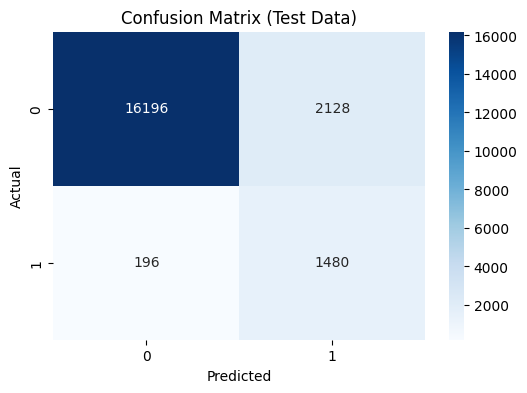

In [46]:
# Drop unnecessary column in test_df
X_test = test_df.drop(["diabetes", "Unnamed: 0"], axis=1)
y_test = test_df["diabetes"]

# Apply same scaler (trained on train set)
X_test_scaled = scaler.transform(X_test)

# Predictions
y_pred_test = log_reg.predict(X_test_scaled)

# Metrics 
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("📊 Logistic Regression Performance (Test Data):")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}\n")

print("🔍 Classification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix on Test Data 
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

🔹 Step 6: Pdf showing results (Bonus)

In [47]:
# 1. Generate classification report text (on test data)
report = classification_report(y_test, y_pred_test, target_names=["No Diabetes", "Diabetes"])

# 2. Create a figure for the report
fig, ax = plt.subplots(figsize=(8.5, 11))  # A4-like size
ax.axis("off")
ax.set_title("Diabetes Classification Report (Logistic Regression - Test Data)", 
             fontsize=16, fontweight="bold", pad=20)

# Display the report text inside the plot
ax.text(0, 1, report, fontsize=12, ha="left", va="top", family="monospace")

# Save the report as PDF
plt.savefig("LogReg_Classification_Report_Test.pdf", bbox_inches="tight")
plt.close()

print("✅ PDF Report saved as 'LogReg_Classification_Report_Test.pdf'")

# 3. Confusion Matrix (on test data)
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Logistic Regression - Test Data)")
plt.savefig("LogReg_Confusion_Matrix_Test.pdf", bbox_inches="tight")
plt.close()

print("✅ Confusion Matrix saved as 'LogReg_Confusion_Matrix_Test.pdf'")


✅ PDF Report saved as 'LogReg_Classification_Report_Test.pdf'
✅ Confusion Matrix saved as 'LogReg_Confusion_Matrix_Test.pdf'
